In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic-training-data.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Survived is dependent variable
#PassangerId can be drop??
#Name is required??
#Sex is categorical so We have to do One hot encoding
#Pclass is also categorical ordinal value
#In age we can drop it aur fill missing value with mean or median
#Ticket is not really required??
#Fare is required??
#Cabin has many missing value and we cant do anything in this so we have to drop
#Embarked do the one hot encoding

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#Visualization

In [10]:
import seaborn as sns

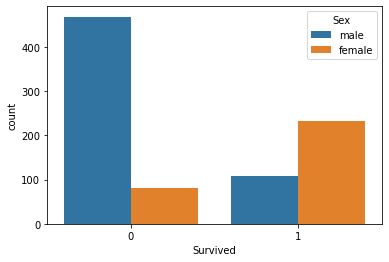

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df)

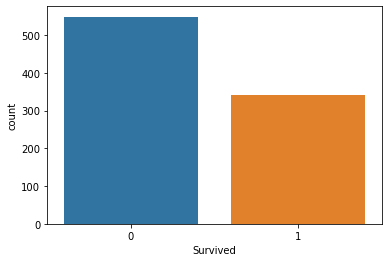

In [12]:
sns.countplot(x='Survived',data=df)

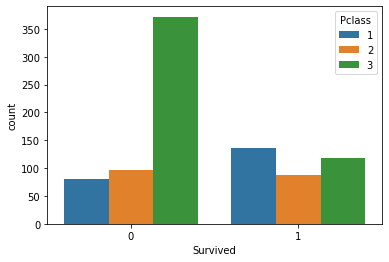

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=df)

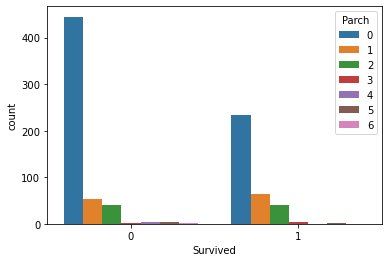

In [14]:
sns.countplot(x='Survived', hue='Parch',data=df)

In [15]:
#Data Wrangling

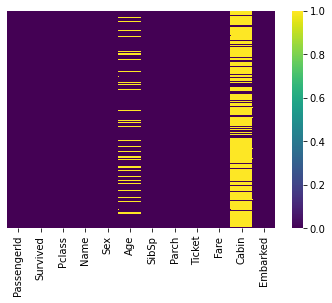

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

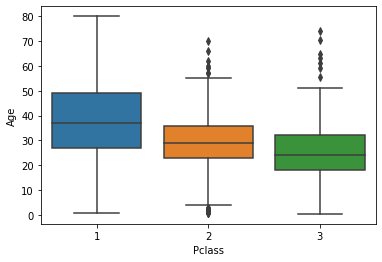

In [17]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [18]:
df.drop('Cabin',axis=1,inplace=True)

In [19]:
df.dropna(inplace=True)

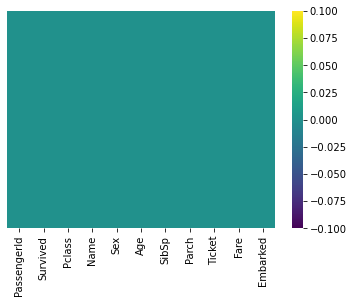

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [21]:
df.shape

(712, 11)

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
#Change categorical in numerical  (OHE is used for ordinal encoding)

In [24]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)   

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Sex_male       0
dtype: int64

In [26]:
df=pd.get_dummies(df,columns=['Embarked','Pclass'],drop_first=True)

In [27]:
#Another method of changing categorical into numerical
Pclass=pd.get_dummies(df['Pclass'])

KeyError: 'Pclass'

In [30]:
Pclass

NameError: name 'Pclass' is not defined

In [31]:
#df=pd.concat([df,Pclass])

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Pclass_2       0
Pclass_3       0
dtype: int64

In [33]:
df.drop(['Name','Fare','PassengerId','Ticket'],axis=1,inplace = True)

In [34]:
df.shape

(712, 9)

In [35]:
#Model Fitting
#Split the data

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [79]:
model=LogisticRegression()

In [80]:
x_train.shape

(498, 8)

In [81]:
y_train.shape

(498,)

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
predication=model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
predication=model.predict(x_test)

In [46]:
accuracy_score(y_test,predication)

0.7552447552447552

In [47]:
model.score(x_train,y_train)

0.8101933216168717

In [48]:
from sklearn import metrics

In [49]:
print(metrics.classification_report(y_test,predication))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        85
           1       0.69      0.71      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



In [50]:
cm=metrics.confusion_matrix(y_test,predication,labels=[1,0])

In [51]:
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]], columns=[i for i in ["Predict 1", "Predict 0"]])

In [52]:
plt.figure(figsize=(7,5))

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

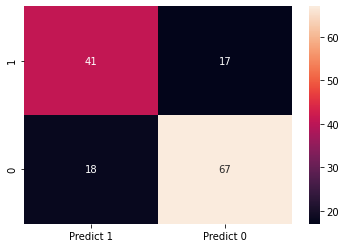

In [53]:
sns.heatmap(df_cm,annot=True,fmt='g')

In [54]:
#Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtree=DecisionTreeClassifier(criterion='gini', random_state=1)

In [57]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [58]:
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.9578207381370826
0.7202797202797203


In [59]:
dtree_e=DecisionTreeClassifier(criterion='entropy', random_state=1)

In [60]:
dtree_e.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [61]:
print(dtree_e.score(x_train,y_train))
print(dtree_e.score(x_test,y_test))

0.9578207381370826
0.7342657342657343


In [62]:
#Max Depth

In [83]:
dtree=DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=3)

In [84]:
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))

0.8192771084337349
0.7897196261682243


In [85]:
dtree_e=DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=2)
dtree_e.fit(x_train,y_train)
print(dtree_e.score(x_train,y_train))
print(dtree_e.score(x_test,y_test))

0.8032128514056225
0.7990654205607477


#Ensemble Learning

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bgcl=BaggingClassifier(n_estimators=50,base_estimator=dtree, random_state=1)
bgcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=1),
                  n_estimators=50, random_state=1)

In [88]:
bgcl.score(x_train,y_train)

0.8373493975903614

In [89]:
bgcl.score(x_test,y_test)

0.822429906542056

In [90]:
bgcl=BaggingClassifier(n_estimators=100,base_estimator=dtree, random_state=1)
bgcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=1),
                  n_estimators=100, random_state=1)

In [91]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8373493975903614
0.8177570093457944


In [92]:
bgcl=BaggingClassifier(n_estimators=100,base_estimator=model, random_state=1)
bgcl.fit(x_train,y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  random_state=1)

In [95]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.9598393574297188
0.7616822429906542


In [100]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=1)
bgcl=BaggingClassifier(n_estimators=50,base_estimator=dtree, random_state=1)
bgcl.fit(x_train,y_train)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8373493975903614
0.822429906542056


In [101]:
#Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfcl=RandomForestClassifier(n_estimators=50,criterion='gini' ,random_state=1)
rfcl.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [106]:

print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.9598393574297188
0.7616822429906542


In [112]:
rfcl=RandomForestClassifier(n_estimators=64,criterion='entropy' ,random_state=1,n_jobs=2)
rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.9598393574297188
0.780373831775701


In [114]:
rfcl=RandomForestClassifier(n_estimators=64,criterion='entropy',max_depth=3 ,random_state=1,n_jobs=2)
rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.8353413654618473
0.7990654205607477


In [115]:
rfcl=RandomForestClassifier(n_estimators=64,criterion='gini',max_depth=3 ,random_state=1,n_jobs=2)
rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.821285140562249
0.7897196261682243


In [118]:
rfcl=RandomForestClassifier(n_estimators=64,criterion='gini',max_depth=3 ,random_state=1)
rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.821285140562249
0.7897196261682243


In [119]:
rfcl=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=3 ,random_state=1)
rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.8232931726907631
0.794392523364486


In [120]:
rfcl=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=3 ,random_state=1)
rfcl.fit(x_train,y_train)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.8253012048192772
0.7897196261682243


In [135]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=1)
bgcl=BaggingClassifier(n_estimators=50,base_estimator=dtree, random_state=1)
bgcl.fit(x_train,y_train)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8373493975903614
0.822429906542056


In [138]:
rfcl=RandomForestClassifier(n_estimators=64,max_features=3 ,random_state=1)      #Max_feature will start from sqrt(no_of_coumns) and then increase
rfcl.fit(x_train,y_train)  
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.9598393574297188
0.780373831775701


In [148]:
rfcl=RandomForestClassifier(n_estimators=50,max_depth=3,max_features=6 ,random_state=1)      #Max_feature will start from sqrt(no_of_coumns) and then increase
rfcl.fit(x_train,y_train)  
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.8333333333333334
0.8130841121495327


In [149]:
#Adaboost

In [151]:
from sklearn.ensemble import AdaBoostClassifier

In [152]:
adcl=AdaBoostClassifier(n_estimators=10,random_state=1)

In [153]:
adcl.fit(x_train,y_train)
print(adcl.score(x_train,y_train))
print(adcl.score(x_test,y_test))

0.8373493975903614
0.7663551401869159


In [154]:
adcl=AdaBoostClassifier(n_estimators=50,random_state=1)
adcl.fit(x_train,y_train)
print(adcl.score(x_train,y_train))
print(adcl.score(x_test,y_test))

0.8473895582329317
0.7850467289719626


In [158]:
adcl=AdaBoostClassifier(n_estimators=64,random_state=1)
adcl.fit(x_train,y_train)
print(adcl.score(x_train,y_train))
print(adcl.score(x_test,y_test))

0.8473895582329317
0.7663551401869159


In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gdcl=GradientBoostingClassifier(n_estimators=50,random_state=1)
gdcl.fit(x_train,y_train)
print(gdcl.score(x_train,y_train))
print(gdcl.score(x_test,y_test))

0.8493975903614458
0.7990654205607477


In [162]:
gdcl=GradientBoostingClassifier(n_estimators=64,random_state=1)
gdcl.fit(x_train,y_train)
print(gdcl.score(x_train,y_train))
print(gdcl.score(x_test,y_test))

0.8795180722891566
0.7850467289719626
